<a href="https://colab.research.google.com/github/NishkaArora/CS155/blob/main/HW1/arora_nishka_3_notebook_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 3, Parts F-H: Stochastic Gradient Descent with a Larger Dataset

Use this notebook to write your code for problem 3 parts F-H by filling in the sections marked `# TODO` and running all cells.

In [ ]:
# Setup.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## Problem 3F: Perform SGD with the new dataset

For the functions below, you may re-use your code from parts 3C-E. Note that you can now modify your SGD function to return the final weight vector instead of the weights after every epoch.

In [ ]:
from sklearn.utils import shuffle
def loss(X, Y, w):
    '''
    Calculate the squared loss function.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w: A (D, ) shaped numpy array containing the weight vector.
    
    Outputs:
        The loss evaluated with respect to X, Y, and w.
    '''
    
    #==============================================
    # TODO: Implement the SGD loss function.
    #==============================================
    return sum(np.square(np.subtract(Y, np.dot(X, w))))

def gradient(x, y, w):
    '''
    Calculate the gradient of the loss function with respect to
    a single point (x, y), and using weight vector w.
    
    Inputs:
        x: A (D, ) shaped numpy array containing a single data point.
        y: The float label for the data point.
        w: A (D, ) shaped numpy array containing the weight vector.
        
    Output:
        The gradient of the loss with respect to x, y, and w. 
    '''
    
    #==============================================
    # TODO: Implement the gradient of the loss function.
    #==============================================    
    return -2 * np.multiply(y - np.dot(x, w), x)

def SGD(X, Y, w_start, eta, N_epochs):
    '''
    Perform SGD using dataset (X, Y), initial weight vector w_start,
    learning rate eta, and N_epochs epochs.
    
    Inputs:
        X: A (N, D) shaped numpy array containing the data points.
        Y: A (N, ) shaped numpy array containing the (float) labels of the data points.
        w_start:  A (D, ) shaped numpy array containing the weight vector initialization.
        eta: The step size.
        N_epochs: The number of epochs (iterations) to run SGD.
        
    Outputs:
        w: A (D, ) shaped array containing the final weight vector.
        losses: A (N_epochs, ) shaped array containing the losses from all iterations.
    '''
    
    #==============================================
    # TODO: Implement the SGD algorithm.
    #==============================================    
    W = []
    losses = []
    w_curr = w_start
    for e in range(N_epochs):
      X, Y = shuffle(X, Y)
      for i in range(len(Y)):
        w_curr -= eta * gradient(X[i], Y[i], w_curr)
      W.append(w_curr)
      losses.append(loss(X, Y, w_curr))
    return W, losses
    

Next, we need to load the dataset. In doing so, the following function may be helpful:

In [ ]:
def load_data(filename):
    """
    Function loads data stored in the file filename and returns it as a numpy ndarray.
    
    Inputs:
        filename: GeneratorExitiven as a string.
    
    Outputs:
        Data contained in the file, returned as a numpy ndarray
    """
    return np.loadtxt(filename, skiprows=1, delimiter=',')

Now, load the dataset in `sgd_data.csv` and run SGD using the given parameters; print out the final weights.

In [ ]:
#==============================================
# TODO:
# (1) load the dataset
# (2) run SGD using the given parameters
# (3) print out the final weights.
#==============================================
import math
# The following should help you get started:
data = load_data('https://raw.githubusercontent.com/charlesincharge/Caltech-CS155-2022/main/sets/set1/data/sgd_data.csv')
X = data[::, :4]
Y = data[::, 4]
ones = np.ones((len(Y), 1))
X = np.hstack((ones, X))

w_start = [0.001] * 5
eta = math.exp(-15)
N_epochs = 800
weights, losses = SGD(X, Y, w_start, eta, N_epochs)
print(weights[-1])

[ -0.22717983  -5.94210262   3.94390655 -11.72383454   8.78567689]


## Problem 3G: Convergence of SGD

This problem examines the convergence of SGD for different learning rates. Please implement your code in the cell below:

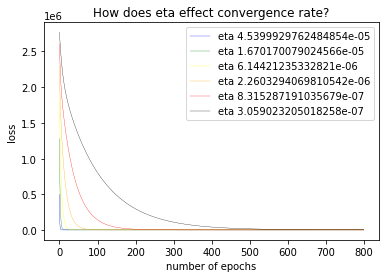

In [ ]:
#==============================================
# TODO: create a plot showing the convergence
# of SGD for the different learning rates.
#==============================================
eta_map = {}
eta_vals = [math.exp(-10), math.exp(-11), math.exp(-12), math.exp(-13), math.exp(-14), math.exp(-15)]
for eta in eta_vals:
  weights, losses = SGD(X, Y, w_start, eta, N_epochs)
  eta_map[eta] = losses

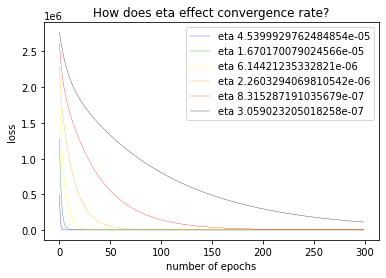

In [ ]:
plt.figure()

plt.plot(range(300), eta_map[eta_vals[0]][0:300], '-', linewidth = 0.3, color='blue')
plt.plot(range(300), eta_map[eta_vals[1]][0:300], '-', linewidth = 0.3, color='green')
plt.plot(range(300), eta_map[eta_vals[2]][0:300], '-', linewidth = 0.3, color='yellow')
plt.plot(range(300), eta_map[eta_vals[3]][0:300], '-', linewidth = 0.3, color='orange')
plt.plot(range(300), eta_map[eta_vals[4]][0:300], '-', linewidth = 0.3, color='red')
plt.plot(range(300), eta_map[eta_vals[5]][0:300], '-', linewidth = 0.3, color='black')

plt.legend(['eta ' + str(eta) for eta in eta_vals], loc='best')
plt.title("How does eta effect convergence rate?")
plt.xlabel("number of epochs")
plt.ylabel("loss")

plt.savefig('How does eta effect convergence')

## Problem 3H

Provide your code for computing the least-squares analytical solution below.

In [ ]:
#==============================================
# TODO: implement the least-squares
# analytical solution.
#==============================================

print(np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), Y))

[ -0.31644251  -5.99157048   4.01509955 -11.93325972   8.99061096]
